In [1]:
# kaggle to google colab

import os
os.environ['KAGGLE_USERNAME'] = "" # username from the json file
os.environ['KAGGLE_KEY'] = "" # key from the json file
! kaggle competitions download -c fake-news # api copied from kaggle

# Upload data
from zipfile import ZipFile

file_name = "/content/train.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

# Upload data
from zipfile import ZipFile

file_name = "/content/test.csv.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
submit.csv: Skipping, found more recently modified local copy (use --force to force download)
done
done


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/train.csv")
df.head(2)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0


In [4]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [6]:
data = df.head(1000)
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
X = df.drop("label",axis=1)
y = df["label"]

In [8]:
df["text"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [9]:
import re
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
pos = PorterStemmer()
l = []
s = "hey Hi @my name"
f = re.sub("[^a-zA-Z]"," ",s)
d = f.lower()
d = d.split()
for g in d:
  if g not in set(stopwords.words("english")):
    # print(g)
    k = [pos.stem(g)]
    print(k)
    n = " ".join(k)
    l.append(n)
print(l)

['hey']
['hi']
['name']
['hey', 'hi', 'name']


In [11]:
len(df["text"])

18285

In [12]:
len(data["text"])

1000

In [13]:
pos = PorterStemmer()
corpus = []
for i in range(len(data["text"])):
  review = re.sub("[^a-zA-Z]"," ",data["text"][i])
  review = review.lower()
  review = review.split()
  review = [pos.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  corpus.append(review)

In [14]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(max_features=5000)
X = count_vector.fit_transform((corpus)).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,data["label"],test_size=0.2,random_state=True)

In [17]:
len(count_vector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5000

In [18]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB(alpha=0.1)
multi.fit(x_train,y_train)

MultinomialNB(alpha=0.1)

In [19]:
pred = multi.predict(x_test)
pred[:5]

array([1, 0, 0, 1, 1])

In [20]:
y_test[:5]

507    1
818    0
452    0
368    1
242    1
Name: label, dtype: int64

In [21]:
count_vector.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

accuracy:   91.500
Confusion matrix, without normalization


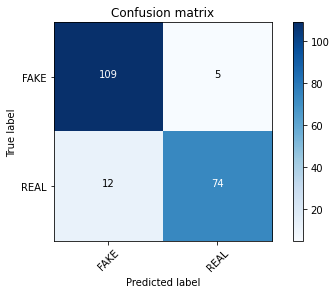

In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


multi.fit(x_train, y_train)
pred = multi.predict(x_test)
score = metrics.accuracy_score(y_test, pred)*100
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [23]:
classifier=MultinomialNB(alpha=0.1)

previous_score = 0
for i in np.arange(0,1,0.1):
  sub_class = MultinomialNB(alpha=i)
  sub_class.fit(x_train,y_train)
  pred = sub_class.predict(x_test)
  score = metrics.accuracy_score(y_test,pred)
  if score > previous_score:
    classifier = sub_class
  # print(f'this is the best score {(list(score).max())}')
  print(f'Alpha : {i} , score : {score}')

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha : 0.0 , score : 0.895
Alpha : 0.1 , score : 0.915
Alpha : 0.2 , score : 0.92
Alpha : 0.30000000000000004 , score : 0.91
Alpha : 0.4 , score : 0.91
Alpha : 0.5 , score : 0.91
Alpha : 0.6000000000000001 , score : 0.91
Alpha : 0.7000000000000001 , score : 0.91
Alpha : 0.8 , score : 0.91
Alpha : 0.9 , score : 0.91


In [24]:
drop_max_features_values = pd.DataFrame({
    "values" : multi.coef_[0],
    "features" : count_vector.get_feature_names()})
drop_max_features_values.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,values,features
0,-11.057752,aaron
1,-14.102275,abadi
2,-8.850001,abandon


In [25]:
drop_max_features_values.sort_values(by="values")

,values,features
4999,-14.102275,zorn
2576,-14.102275,lewinski
2625,-14.102275,locht
2633,-14.102275,lonesom
350,-14.102275,baldwin
...,...,...
4748,-5.402593,us
3110,-5.264303,one
4251,-5.230068,state
817,-5.224474,clinton


# **Implementing Word Embedding Using Keras**

In [26]:
### sentences
sent=[  'the glass of milk',
     'the glass of juice',
     'the cup of tea',
    'I am a good boy',
     'I am a good developer',
     'understand the meaning of words',
     'your videos are good',]

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
tf.__version__

'2.7.0'

In [29]:
from keras.preprocessing.text import one_hot

In [30]:
voc_size=10000

In [31]:
one_hot_word = [one_hot(words,voc_size) for words in sent]
one_hot_word

[[9035, 3522, 7179, 7185],
 [9035, 3522, 7179, 3275],
 [9035, 3757, 7179, 9425],
 [2157, 6147, 9023, 3599, 4440],
 [2157, 6147, 9023, 3599, 166],
 [62, 9035, 5144, 7179, 1277],
 [6290, 9427, 379, 3599]]

In [32]:
from tensorflow.keras.layers import Embedding

## embedding layer 
from tensorflow.keras.preprocessing.sequence import pad_sequences  


## used for the keeping all this in one vector like a 300 dim all layers as you can 
## see some are having large some are having less so we have to make it equal so we use pad_sequence
from tensorflow.keras.models import Sequential

## it is used to create a model

In [33]:
embeddin_layer = pad_sequences(one_hot_word,maxlen=10)
embeddin_layer

array([[   0,    0,    0,    0,    0,    0, 9035, 3522, 7179, 7185],
       [   0,    0,    0,    0,    0,    0, 9035, 3522, 7179, 3275],
       [   0,    0,    0,    0,    0,    0, 9035, 3757, 7179, 9425],
       [   0,    0,    0,    0,    0, 2157, 6147, 9023, 3599, 4440],
       [   0,    0,    0,    0,    0, 2157, 6147, 9023, 3599,  166],
       [   0,    0,    0,    0,    0,   62, 9035, 5144, 7179, 1277],
       [   0,    0,    0,    0,    0,    0, 6290, 9427,  379, 3599]],
      dtype=int32)

In [34]:
model = Sequential()
model.add(Embedding(voc_size,10,input_length=10))
model.compile("adam","mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 10)            100000    
                                                                 
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


In [35]:
print(model.predict(embeddin_layer)[0])

[[ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.038573    0.01288799 -0.03805478 -0.01626166 -0.02047133 -0.02140073
   0.00893742 -0.04540584  0.03872976  0.03376175]
 [ 0.00158093  0.00768437 -0.02241307 -0.03952503  0.02074624 -0.00958027
   0.01591336  0.04064986  0.02540721 -0.03409559]
 [ 0.03360219  0.03250707 -0.00536699 -0.00366772  0.02748242 -0.00927138
  -0.04210713  0.0293988   0.01414112 -0.04420662]


In [36]:
embeddin_layer[0]

array([   0,    0,    0,    0,    0,    0, 9035, 3522, 7179, 7185],
      dtype=int32)

In [37]:
## the above you can see that the 0 index word has converted to 10 dimensions and the other words till 
## 0 has the same index in the top(predict) later when it is 189 it got changed see it you will understand


# LSTM

```
# [CLICK HERE FOR BLOG IT IS MORE IMPORTNAT OR SEE KRISH VIDEO](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
```



In [38]:
df = pd.read_csv("/content/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [39]:
for i in range(5):
  print(f'{i} : {df["title"][i]}')

0 : House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1 : FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
2 : Why the Truth Might Get You Fired
3 : 15 Civilians Killed In Single US Airstrike Have Been Identified
4 : Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery


In [40]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [41]:
df.isnull().sum()
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [42]:
df.isna().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [43]:
X = df.drop("label",axis=1)
y = df["label"]

In [44]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [45]:
from tensorflow.keras.layers import Embedding,LSTM,Dense  ## this is used in createing a model layers
from tensorflow.keras.models import Sequential   ## used to create a model
from tensorflow.keras.preprocessing.text import one_hot   ## change the data to 1000 smtg stuff like that
from tensorflow.keras.preprocessing.sequence import pad_sequences   ## to make sure that the given data is having same dimensions and len

In [46]:
voc_size = 5000

In [47]:
df.text[1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [48]:
messgaes = X.copy()

In [49]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [50]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
import re

In [52]:
ps = PorterStemmer()
corpus = []
for i in range(len(messgaes)):
  review = re.sub('[^a-zA-Z]'," ",messgaes["title"][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  corpus.append(review)

In [53]:
corpus[2]

'truth might get fire'

In [54]:
messgaes["title"][2]

'Why the Truth Might Get You Fired'

In [55]:
one_hot_ex = [one_hot(words,voc_size) for words in corpus]
one_hot_ex[:10]

[[1880, 4716, 2324, 4715, 586, 3453, 605, 3461, 2068, 636],
 [3686, 4351, 1334, 170, 2045, 894, 2702],
 [4696, 666, 344, 960],
 [1637, 1617, 1246, 4909, 4279, 648],
 [4038, 2045, 1872, 3200, 682, 2393, 2045, 2046, 3232, 2794],
 [1461,
  1080,
  1095,
  2618,
  1826,
  1460,
  2898,
  833,
  4537,
  1393,
  3474,
  611,
  4156,
  4031,
  2702],
 [858, 2929, 3840, 4960, 707, 4482, 3261, 3318, 838, 285, 324],
 [2558, 2489, 863, 3940, 2541, 227, 1460, 1436, 838, 285, 324],
 [3932, 1641, 2631, 1940, 34, 1937, 4838, 1831, 1460, 3167],
 [4011, 3051, 3454, 760, 1655, 3149, 3320, 2203]]

In [56]:
pad_sequence_doc = pad_sequences(one_hot_ex,maxlen=20)
pad_sequence_doc[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1880,
        4716, 2324, 4715,  586, 3453,  605, 3461, 2068,  636],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3686, 4351, 1334,  170, 2045,  894, 2702],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 4696,  666,  344,  960],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 1637, 1617, 1246, 4909, 4279,  648],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4038,
        2045, 1872, 3200,  682, 2393, 2045, 2046, 3232, 2794]],
      dtype=int32)

In [57]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(LSTM(100))
model.add(Dense(1,activation="sigmoid"))
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [58]:
len(pad_sequence_doc)

18285

In [59]:
y.shape

(18285,)

In [60]:
X_final = np.array(pad_sequence_doc)
y_final = np.array(y)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.2,random_state=True)

In [62]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
458/458 [==============================] - 11s 17ms/step - loss: 0.2578 - accuracy: 0.8846 - val_loss: 0.1932 - val_accuracy: 0.9202
Epoch 2/10
458/458 [==============================] - 5s 11ms/step - loss: 0.1335 - accuracy: 0.9453 - val_loss: 0.1852 - val_accuracy: 0.9262
Epoch 3/10
458/458 [==============================] - 5s 10ms/step - loss: 0.0982 - accuracy: 0.9629 - val_loss: 0.2098 - val_accuracy: 0.9182
Epoch 4/10
458/458 [==============================] - 5s 10ms/step - loss: 0.0688 - accuracy: 0.9746 - val_loss: 0.2379 - val_accuracy: 0.9191
Epoch 5/10
458/458 [==============================] - 5s 11ms/step - loss: 0.0404 - accuracy: 0.9864 - val_loss: 0.3056 - val_accuracy: 0.9232
Epoch 6/10
458/458 [==============================] - 5s 10ms/step - loss: 0.0255 - accuracy: 0.9913 - val_loss: 0.3471 - val_accuracy: 0.9114
Epoch 7/10
458/458 [==============================] - 5s 11ms/step - loss: 0.0172 - accuracy: 0.9950 - val_loss: 0.4219 - val_accuracy: 0.916

In [63]:
from tensorflow.python.keras.layers.core import Dropout
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            200000    
                                                                 
 module_wrapper (ModuleWrapp  (None, 20, 40)           0         
 er)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 module_wrapper_1 (ModuleWra  (None, 100)              0         
 pper)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-tr

In [64]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
229/229 [==============================] - 6s 14ms/step - loss: 0.3179 - accuracy: 0.8618 - val_loss: 0.1798 - val_accuracy: 0.9229
Epoch 2/10
229/229 [==============================] - 3s 12ms/step - loss: 0.1456 - accuracy: 0.9434 - val_loss: 0.1799 - val_accuracy: 0.9270
Epoch 3/10
229/229 [==============================] - 3s 12ms/step - loss: 0.1023 - accuracy: 0.9618 - val_loss: 0.1922 - val_accuracy: 0.9264
Epoch 4/10
229/229 [==============================] - 3s 12ms/step - loss: 0.0759 - accuracy: 0.9729 - val_loss: 0.2172 - val_accuracy: 0.9243
Epoch 5/10
229/229 [==============================] - 3s 12ms/step - loss: 0.0538 - accuracy: 0.9820 - val_loss: 0.2871 - val_accuracy: 0.9248
Epoch 6/10
229/229 [==============================] - 4s 15ms/step - loss: 0.0371 - accuracy: 0.9867 - val_loss: 0.3228 - val_accuracy: 0.9253
Epoch 7/10
229/229 [==============================] - 4s 17ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.3213 - val_accuracy: 0.9193

In [65]:
df["label"].value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [66]:
pred = model.predict(x_test)

In [67]:
pred

array([[9.9725819e-01],
       [9.9999774e-01],
       [1.3977195e-06],
       ...,
       [6.9846719e-05],
       [5.2065079e-06],
       [1.0525619e-04]], dtype=float32)

In [68]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [69]:
y_test[:30]

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0])

In [70]:
from sklearn.metrics import roc_auc_score,accuracy_score
print(roc_auc_score(y_test,predictions))

# print(accuracy_score(y_test,np.array([np.argmax(i) for i in pred])))

0.9151987291280488


## **STOCKS PREDICTION**

In [71]:
import pandas_datareader as pdr
import pandas as pd
key = "7152b28055f4349188466c9dff744d371d60a603"

In [72]:
df = pdr.get_data_tiingo("AAPL",api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [73]:
df.to_csv("Apple_stocks_data.csv")

In [74]:
df = pd.read_csv("/content/Apple_stocks_data.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-15 00:00:00+00:00,135.510,136.27,134.6200,135.52,35623100,31.980878,32.160241,31.770835,31.983239,142492400,0.0,1.0
1,AAPL,2017-02-16 00:00:00+00:00,135.345,135.90,134.8398,135.67,22584555,31.941938,32.072920,31.822709,32.018639,90338220,0.0,1.0
2,AAPL,2017-02-17 00:00:00+00:00,135.720,135.83,135.1000,135.10,22198197,32.030439,32.056400,31.884117,31.884117,88792788,0.0,1.0
3,AAPL,2017-02-21 00:00:00+00:00,136.700,136.75,135.9800,136.23,24507156,32.261723,32.273523,32.091800,32.150801,98028624,0.0,1.0
4,AAPL,2017-02-22 00:00:00+00:00,137.110,137.12,136.1100,136.43,20836932,32.358485,32.360845,32.122481,32.198002,83347728,0.0,1.0


In [75]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-02-07 00:00:00+00:00,171.66,173.9458,170.95,172.86,77251204,171.66,173.9458,170.95,172.86,77251204,0.0,1.0
1254,AAPL,2022-02-08 00:00:00+00:00,174.83,175.3500,171.43,171.73,74829217,174.83,175.3500,171.43,171.73,74829217,0.0,1.0
1255,AAPL,2022-02-09 00:00:00+00:00,176.28,176.6500,174.90,176.05,71285038,176.28,176.6500,174.90,176.05,71285038,0.0,1.0
1256,AAPL,2022-02-10 00:00:00+00:00,172.12,175.4800,171.55,174.14,90865899,172.12,175.4800,171.55,174.14,90865899,0.0,1.0
1257,AAPL,2022-02-11 00:00:00+00:00,168.64,173.0800,168.04,172.33,98670687,168.64,173.0800,168.04,172.33,98670687,0.0,1.0


In [76]:
df.shape

(1258, 14)

In [77]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [78]:
df1 = df.reset_index()["close"]
df1[:5]

0    135.510
1    135.345
2    135.720
3    136.700
4    137.110
Name: close, dtype: float64

In [79]:
import plotly.express as px
px.line(df1.values)

In [80]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

import numpy as np
from sklearn.preprocessing import MinMaxScaler
sclaler = MinMaxScaler()
df1 = sclaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.07180964],
       [0.07139637],
       [0.07233563],
       ...,
       [0.17392611],
       [0.16350657],
       [0.15479023]])

In [81]:
train_data_size = int(len(df1)*0.70)
test_data_size = len(df1) - train_data_size
train_data,test_data = df1[0:train_data_size,:],df1[train_data_size:len(df1),:1]
print(train_data.shape,test_data.shape)

(880, 1) (378, 1)


In [82]:
train_data[:5]

array([[0.07180964],
       [0.07139637],
       [0.07233563],
       [0.07479023],
       [0.07581716]])

[click here](https://ibb.co/yhYJsqf)  ---> your data should do model like this

In [83]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [84]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [85]:
print(X_train.shape)
print(X_test.shape)

(779, 100)
(277, 100)


In [86]:
print(y_train.shape)
print(y_test.shape)

(779,)
(277,)


In [87]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [88]:
X_train.shape

(779, 100, 1)

In [89]:
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
from tensorflow.keras.models import Sequential

In [90]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_3 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
13/13 [==============================] - 8s 195ms/step - loss: 0.0347 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 1s 83ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 1s 83ms/step - loss: 0.0022 - accuracy: 0.0000e+00 - val_loss: 3.1491e-04 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 1s 83ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 2.9246e-04 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 4.1207e-04 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 1s 81ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 4.3648e-04 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 1s 82ms/step - loss: 0.0011 - accurac

In [92]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [93]:
##Transformback to original form
train_predict=sclaler.inverse_transform(train_predict)
test_predict=sclaler.inverse_transform(test_predict)

In [94]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

227.50685571873407

In [95]:
math.sqrt(mean_squared_error(y_test,test_predict))

148.42271226561283

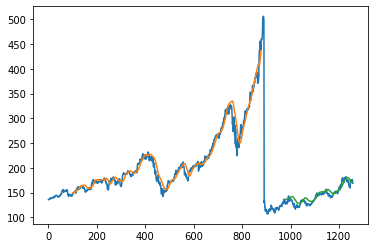

In [96]:
### Plotting 
# shift train predictions for plotting
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(sclaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
len(test_data)

378

In [98]:
x_input=test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [100]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

[0.16457814]
101
1 day input [0.10016281 0.10038823 0.09650595 0.0878397  0.09014402 0.08681277
 0.08969317 0.08090169 0.08583594 0.08806512 0.09129618 0.09031935
 0.09009393 0.08683782 0.085335   0.09247339 0.09517846 0.09946149
 0.10499687 0.10624922 0.10680025 0.10482154 0.10469631 0.1063995
 0.10522229 0.11453976 0.10760175 0.10549781 0.10815279 0.11183469
 0.1105072  0.1113087  0.10920476 0.1101315  0.10289292 0.10276769
 0.10807765 0.10810269 0.11060739 0.11684408 0.12781465 0.13452724
 0.13570445 0.13668128 0.13800877 0.12515967 0.13375078 0.14642455
 0.14509706 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048
 0.16961803 0.181866   0.17257358 0.16904195 0.18149029 0.16385723
 0.16105197 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013
 0.18146525 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217
 0.17051972 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759
 0.1636819  0.16588604 0.15769568 0.14875391 0.14444584 0.13918597
 0.13720726 0.13259862 0.1323732  

In [101]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [102]:
len(df1)

1258

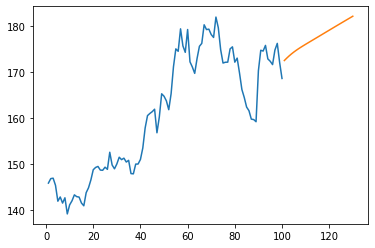

In [103]:
plt.plot(day_new,sclaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,sclaler.inverse_transform(lst_output))

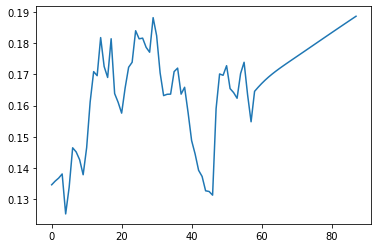

In [104]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [105]:
df3=sclaler.inverse_transform(df3).tolist()
df3[:5]

[[135.51], [135.345], [135.72], [136.7], [137.11]]

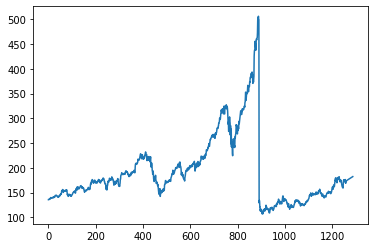

In [106]:
plt.plot(df3)

# BIDIRECTIONAL RNN

In [107]:
df = pd.read_csv("/content/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [108]:
# df["label_counts"] = df["title"].apply(lambda x:len(x))
# df.head()

In [109]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [110]:
# 100% ------ > 80% of data is 0 and 20% of data is 1 --- >imbalance data --- > imblearn or the other techinique to red of it is use the roc_auc_cure

df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [111]:
# df["title"].fillna("SOMETHING VALUE WHICH IS NOT FILLED",inplace=True)
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.isna().sum()

index     0
id        0
title     0
author    0
text      0
label     0
dtype: int64

In [112]:
from tensorflow.keras.layers import Embedding,Dropout,Dense,LSTM,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential

In [113]:
import nltk
import re
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
len(df["title"])

18285

In [115]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
c = []
pos = PorterStemmer()
for i in range(len(df["title"])):
  review = re.sub("[^a-zA-Z]"," ",df["title"][i])
  review = review.lower()
  review = review.split()
  review = [pos.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = " ".join(review)
  c.append(review)

In [116]:
c[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [117]:
df["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [118]:
# for i in range(10):
#   print(df["title"][i])

In [119]:
one_hot_rep = [one_hot(word,10000)for word in c]
one_hot_rep

[[6464, 5916, 6395, 9438, 7523, 6883, 7621, 4456, 5278, 146],
 [4304, 3873, 3195, 3032, 1588, 7191, 5376],
 [9691, 1173, 9328, 9286],
 [6911, 3895, 5298, 257, 1044, 8916],
 [9530, 1588, 6631, 7298, 538, 5316, 1588, 2226, 7687, 520],
 [7742,
  3938,
  8168,
  1916,
  8833,
  4930,
  8303,
  6894,
  5922,
  6672,
  5597,
  9600,
  6877,
  9710,
  5376],
 [7285, 7014, 9536, 7470, 8833, 7048, 7379, 1623, 1595, 6202, 2308],
 [4701, 9954, 6812, 723, 8861, 4501, 4930, 4695, 1595, 6202, 2308],
 [8779, 1947, 2123, 3322, 9893, 5559, 1164, 8408, 4930, 8094],
 [8840, 1343, 8453, 7215, 1800, 5159, 7147, 6093],
 [8282, 2966, 24, 8181, 8352, 5056, 4949, 339, 3568, 8609, 1780],
 [257, 4112, 7523, 5559, 4930, 8861],
 [7319, 5461, 2134, 8389, 4838, 3803, 1083, 8349, 998],
 [4370, 8983, 6751, 3151, 9318, 5729, 9966, 1595, 6202, 2308],
 [9468, 310, 8504, 1575, 2707, 1595, 6202, 2308],
 [9917, 4681, 9885, 5069, 8450, 4030, 8284, 8024, 502, 1403],
 [1393, 3390, 3873],
 [5941, 4784, 4309, 9711, 4930, 1047, 1

In [120]:
pad_seq_rep = pad_sequences(one_hot_rep,maxlen=20,padding="pre")
pad_seq_rep[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 6464,
       5916, 6395, 9438, 7523, 6883, 7621, 4456, 5278,  146], dtype=int32)

In [121]:
model = Sequential()
model.add(Embedding(1000,40,input_length=20))
model.add(LSTM(100))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            40000     
                                                                 
 lstm_5 (LSTM)               (None, 100)               56400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 96,501
Trainable params: 96,501
Non-trainable params: 0
_________________________________________________________________


In [122]:
model_1 = Sequential()
model_1.add(Embedding(1000,40,input_length=20))
model_1.add(Bidirectional(LSTM(100)))
model_1.add(Dropout(0.2))
model_1.add(Dense(1,activation="sigmoid"))
model_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            40000     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 153,001
Trainable params: 153,001
Non-trainable params: 0
_________________________________________________________________


In [123]:
X = np.array(pad_seq_rep)
y = np.array(df["label"].values)

In [124]:
X.shape

(18285, 20)

In [125]:
y.shape

(18285,)

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [127]:
X_train.shape

(12799, 20)

In [128]:
X_test.shape

(5486, 20)

In [129]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
200/200 [==============================] - 5s 15ms/step - loss: 0.6074 - accuracy: 0.6815 - val_loss: 0.5777 - val_accuracy: 0.7071
Epoch 2/20
200/200 [==============================] - 2s 12ms/step - loss: 0.5658 - accuracy: 0.7076 - val_loss: 0.5618 - val_accuracy: 0.7080
Epoch 3/20
200/200 [==============================] - 3s 14ms/step - loss: 0.5476 - accuracy: 0.7215 - val_loss: 0.5660 - val_accuracy: 0.7104
Epoch 4/20
200/200 [==============================] - 3s 14ms/step - loss: 0.5422 - accuracy: 0.7272 - val_loss: 0.5609 - val_accuracy: 0.7100
Epoch 5/20
200/200 [==============================] - 2s 12ms/step - loss: 0.5314 - accuracy: 0.7312 - val_loss: 0.5644 - val_accuracy: 0.7071
Epoch 6/20
200/200 [==============================] - 3s 14ms/step - loss: 0.5248 - accuracy: 0.7359 - val_loss: 0.5677 - val_accuracy: 0.7087
Epoch 7/20
200/200 [==============================] - 3s 14ms/step - loss: 0.5212 - accuracy: 0.7401 - val_loss: 0.5792 - val_accuracy: 0.7102

In [130]:
### Finally Training
model_1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=64)

Epoch 1/20
200/200 [==============================] - 9s 25ms/step - loss: 0.6028 - accuracy: 0.6789 - val_loss: 0.5689 - val_accuracy: 0.7144
Epoch 2/20
200/200 [==============================] - 4s 20ms/step - loss: 0.5505 - accuracy: 0.7238 - val_loss: 0.5632 - val_accuracy: 0.7071
Epoch 3/20
200/200 [==============================] - 4s 19ms/step - loss: 0.5387 - accuracy: 0.7314 - val_loss: 0.5611 - val_accuracy: 0.7118
Epoch 4/20
200/200 [==============================] - 4s 20ms/step - loss: 0.5262 - accuracy: 0.7414 - val_loss: 0.5574 - val_accuracy: 0.7193
Epoch 5/20
200/200 [==============================] - 4s 19ms/step - loss: 0.5196 - accuracy: 0.7452 - val_loss: 0.5622 - val_accuracy: 0.7186
Epoch 6/20
200/200 [==============================] - 4s 19ms/step - loss: 0.5119 - accuracy: 0.7485 - val_loss: 0.5661 - val_accuracy: 0.7156
Epoch 7/20
200/200 [==============================] - 4s 19ms/step - loss: 0.5066 - accuracy: 0.7501 - val_loss: 0.5526 - val_accuracy: 0.7178

In [131]:
# print(model_history.history.keys())
# # summarize history for accuracy
# plt.plot(model_history.history['acc'])
# plt.plot(model_history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# # summarize history for loss
# plt.plot(model_history.history['loss'])
# plt.plot(model_history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()





# **for plotting we can use the above codee**

In [132]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=-1)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
y_test[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [134]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.566350710900474

In [135]:
y_pred_model_1 = model_1.predict(X_test)
# y_pred_model_1 = np.argmax(y_pred_model_1,axis=1)
y_pred_model_1[:10]

array([[0.7764816 ],
       [0.21489157],
       [0.29211646],
       [0.55206966],
       [0.97464865],
       [0.85499716],
       [0.56736994],
       [0.6968153 ],
       [0.03117529],
       [0.35826057]], dtype=float32)

In [136]:
y_test[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,np.argmax(y_pred_model_1,axis=-1))

0.566350710900474

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_model_1)

0.7719718034897403

In [139]:
df["label"].value_counts()

0    10361
1     7924
Name: label, dtype: int64